In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = pd.read_csv('Iris.csv')

In [3]:
# Display basic statistics
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


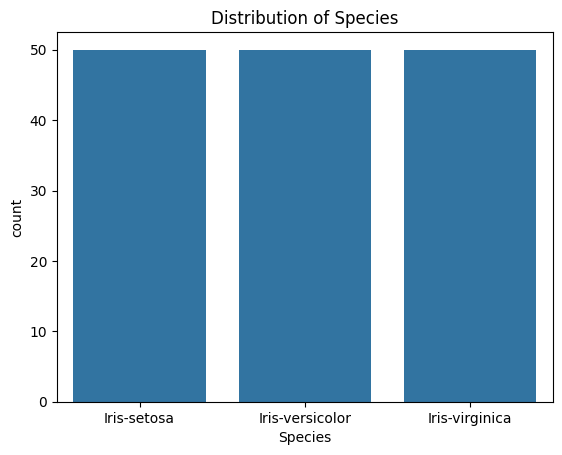

In [7]:
# Distribution of species
sns.countplot(x='Species', data=iris)
plt.title('Distribution of Species')
plt.show()

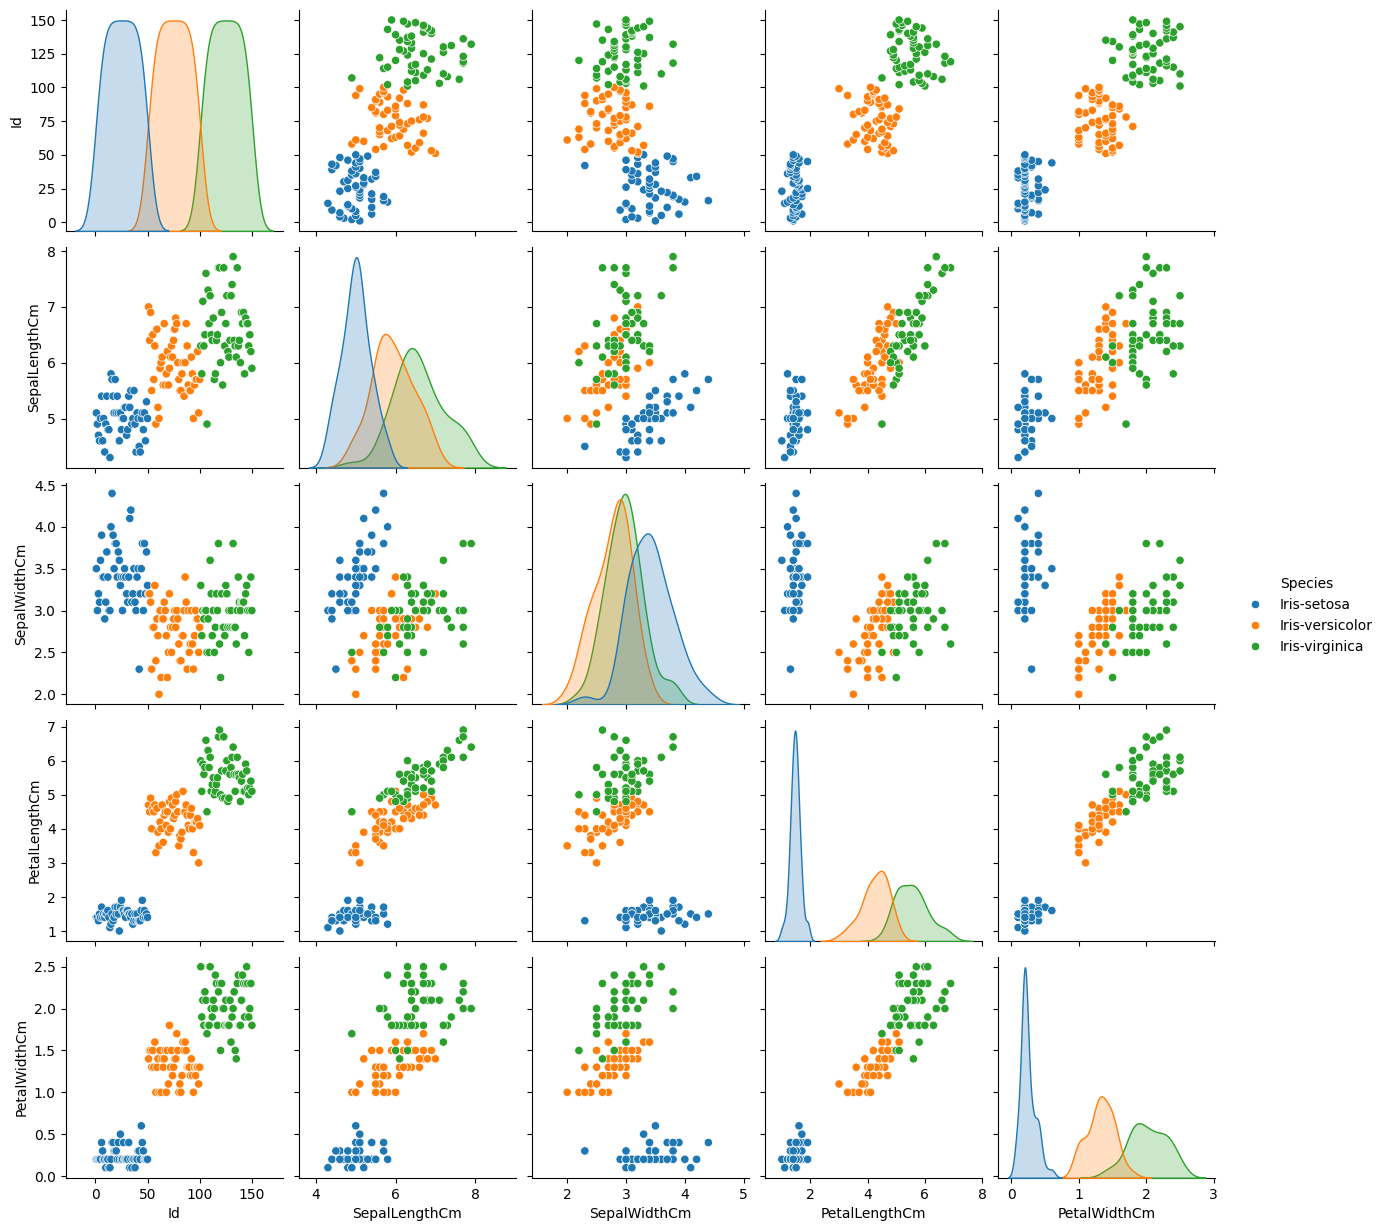

In [8]:
# Pairplot to visualize feature relationships
sns.pairplot(iris, hue='Species')
plt.show()

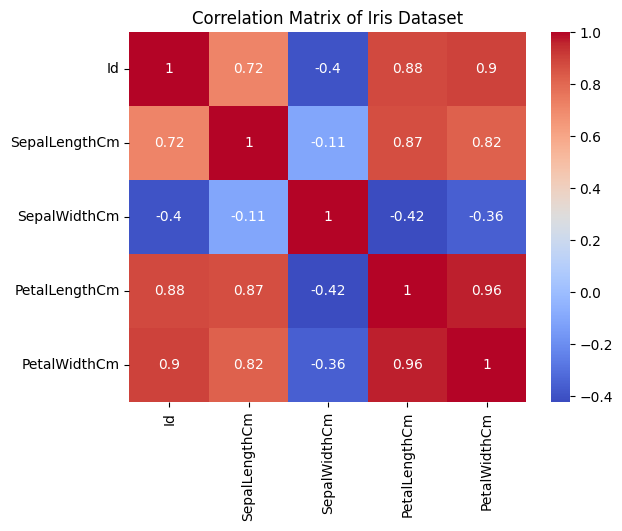

In [9]:
# Correlation matrix
correlation_matrix = iris.drop('Species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

In [10]:
# Load the Wholesale Customers dataset
wholesale_customers = pd.read_csv('Wholesale customers data.csv')

In [11]:
# Summary statistics
print(wholesale_customers.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

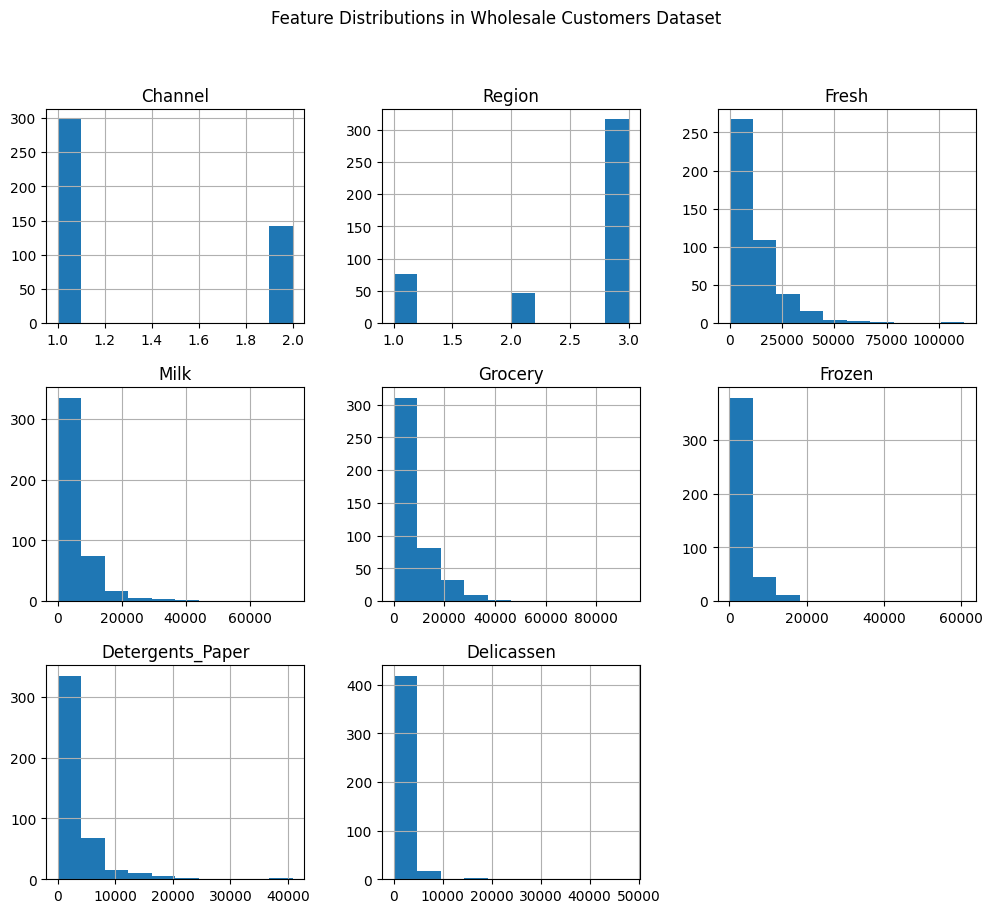

In [13]:
# Feature distributions
wholesale_customers.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions in Wholesale Customers Dataset')
plt.show()

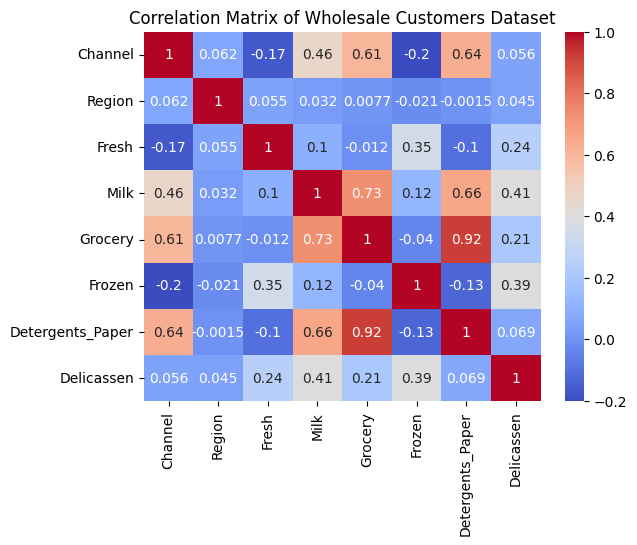

In [14]:
# Correlation matrix
correlation_matrix = wholesale_customers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wholesale Customers Dataset')
plt.show()

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

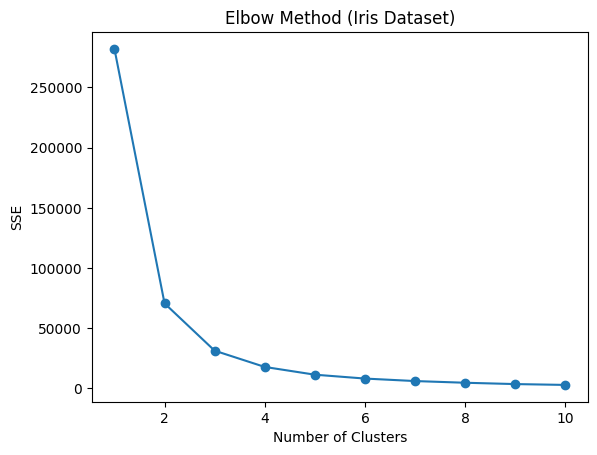

In [16]:
#Determine optimal clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(iris.drop('Species', axis=1))
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method (Iris Dataset)')
plt.show()

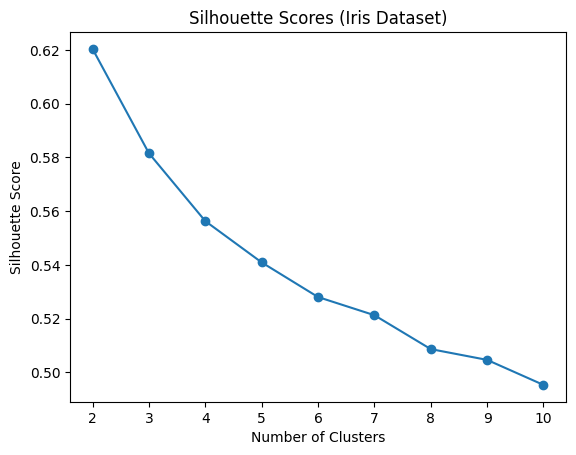

In [17]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(iris.drop('Species', axis=1))
    silhouette_scores.append(silhouette_score(iris.drop('Species', axis=1), clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (Iris Dataset)')
plt.show()

In [18]:
# Optimal KMeans Clustering (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
iris['Cluster'] = kmeans.fit_predict(iris.drop('Species', axis=1))

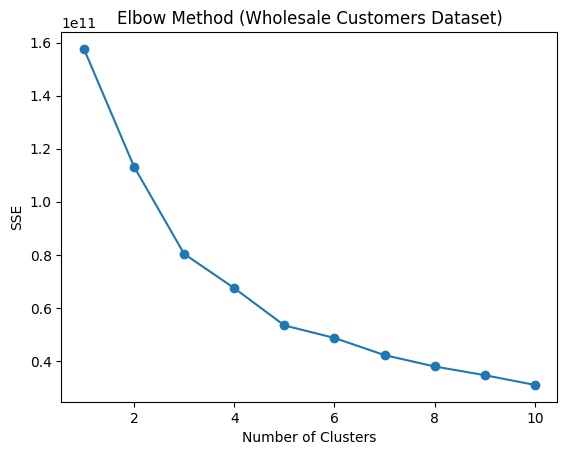

In [19]:
# Determine optimal clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(wholesale_customers)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method (Wholesale Customers Dataset)')
plt.show()


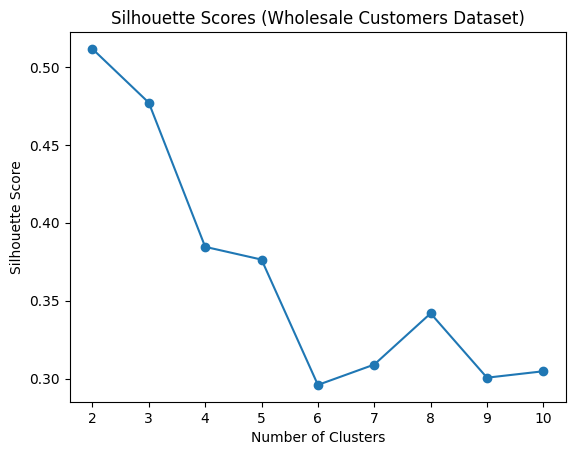

In [20]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(wholesale_customers)
    silhouette_scores.append(silhouette_score(wholesale_customers, clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (Wholesale Customers Dataset)')
plt.show()

In [21]:
# Optimal KMeans Clustering (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=0)
wholesale_customers['Cluster'] = kmeans.fit_predict(wholesale_customers)

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [23]:
# Hierarchical Clustering
Z = linkage(iris.drop('Species', axis=1), method='ward')

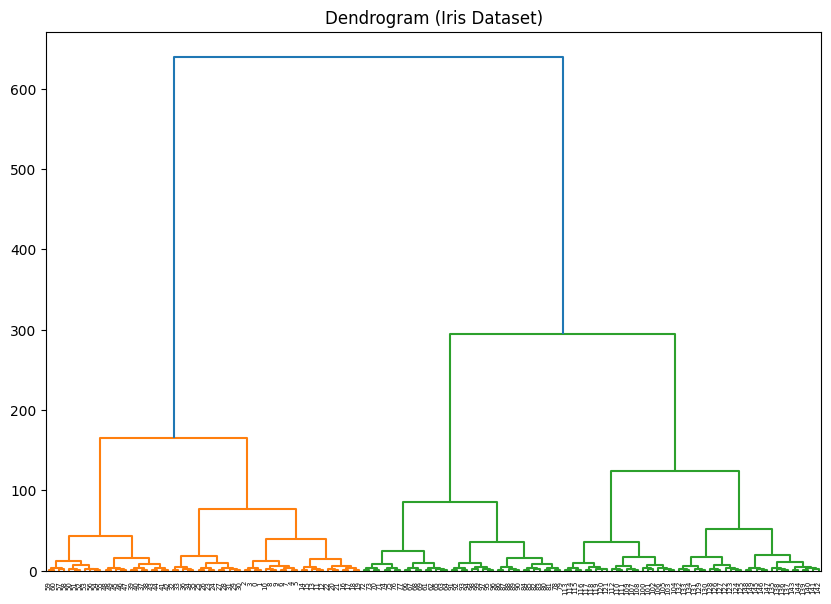

In [24]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Iris Dataset)')
plt.show()

In [25]:
# Assign clusters (e.g., 3 clusters)
iris['HierarchicalCluster'] = fcluster(Z, t=3, criterion='maxclust')

In [26]:
# Hierarchical Clustering
Z = linkage(wholesale_customers, method='ward')

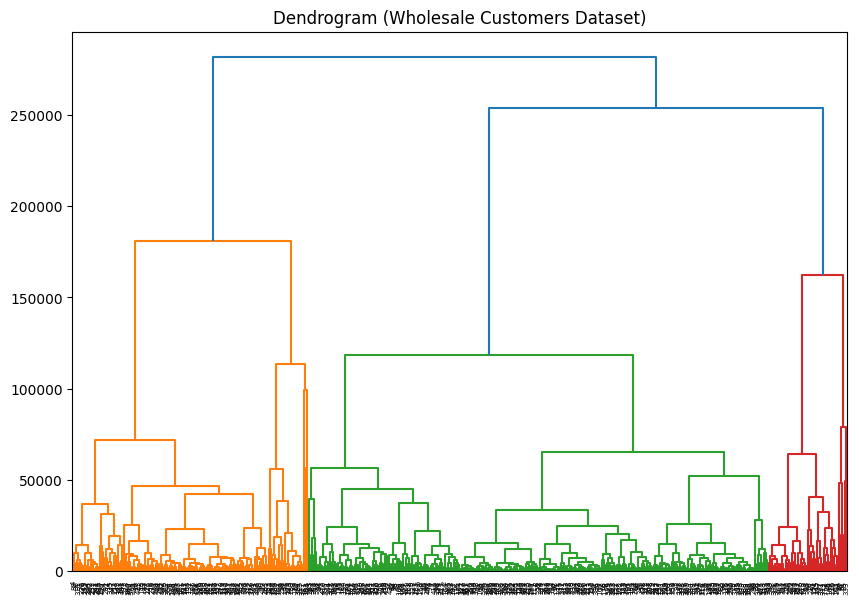

In [27]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Wholesale Customers Dataset)')
plt.show()

In [28]:
# Assign clusters (e.g., 5 clusters)
wholesale_customers['HierarchicalCluster'] = fcluster(Z, t=5, criterion='maxclust')

In [29]:
from sklearn.decomposition import PCA

In [30]:
# PCA for visualization
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.drop(['Species', 'Cluster', 'HierarchicalCluster'], axis=1))


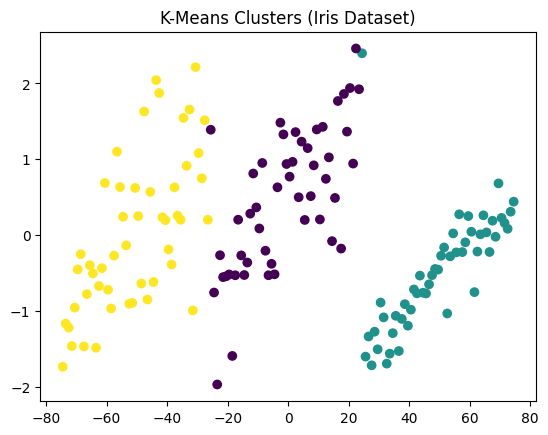

In [31]:
# Plot K-Means Clusters
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris['Cluster'], cmap='viridis')
plt.title('K-Means Clusters (Iris Dataset)')
plt.show()

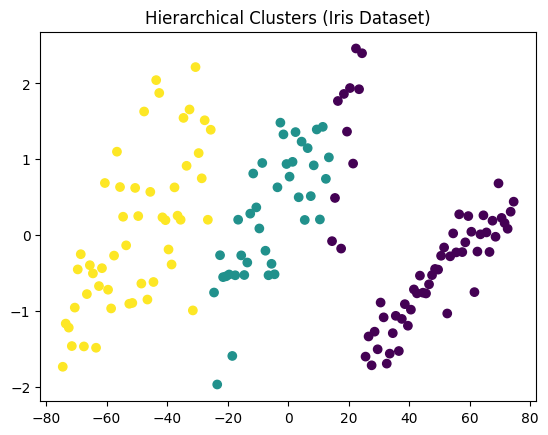

In [32]:
# Plot Hierarchical Clusters
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris['HierarchicalCluster'], cmap='viridis')
plt.title('Hierarchical Clusters (Iris Dataset)')
plt.show()

In [33]:
# PCA for visualization
wholesale_pca = pca.fit_transform(wholesale_customers.drop(['Cluster', 'HierarchicalCluster'], axis=1))

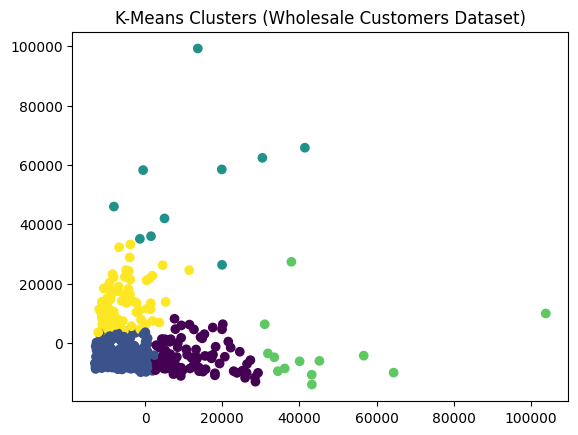

In [34]:
# Plot K-Means Clusters
plt.scatter(wholesale_pca[:, 0], wholesale_pca[:, 1], c=wholesale_customers['Cluster'], cmap='viridis')
plt.title('K-Means Clusters (Wholesale Customers Dataset)')
plt.show()


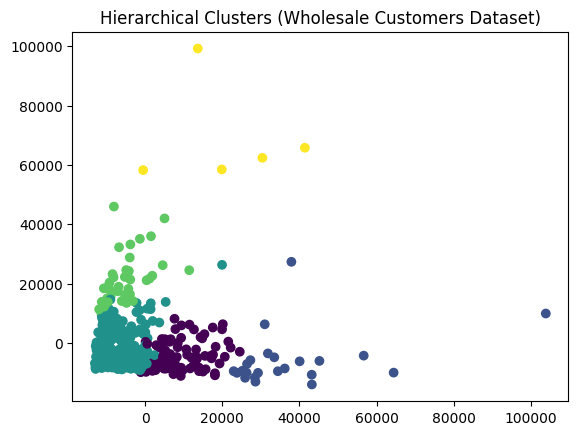

In [35]:
# Plot Hierarchical Clusters
plt.scatter(wholesale_pca[:, 0], wholesale_pca[:, 1], c=wholesale_customers['HierarchicalCluster'], cmap='viridis')
plt.title('Hierarchical Clusters (Wholesale Customers Dataset)')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [37]:
# Silhouette Scores
iris_kmeans_silhouette = silhouette_score(iris.drop(['Species', 'Cluster', 'HierarchicalCluster'], axis=1), iris['Cluster'])
iris_hierarchical_silhouette = silhouette_score(iris.drop(['Species', 'Cluster', 'HierarchicalCluster'], axis=1), iris['HierarchicalCluster'])

wholesale_kmeans_silhouette = silhouette_score(wholesale_customers.drop(['Cluster', 'HierarchicalCluster'], axis=1), wholesale_customers['Cluster'])
wholesale_hierarchical_silhouette = silhouette_score(wholesale_customers.drop(['Cluster', 'HierarchicalCluster'], axis=1), wholesale_customers['HierarchicalCluster'])

In [38]:
# Davies-Bouldin Index
iris_kmeans_davies_bouldin = davies_bouldin_score(iris.drop(['Species', 'Cluster', 'HierarchicalCluster'], axis=1), iris['Cluster'])
iris_hierarchical_davies_bouldin = davies_bouldin_score(iris.drop(['Species', 'Cluster', 'HierarchicalCluster'], axis=1), iris['HierarchicalCluster'])

wholesale_kmeans_davies_bouldin = davies_bouldin_score(wholesale_customers.drop(['Cluster', 'HierarchicalCluster'], axis=1), wholesale_customers['Cluster'])
wholesale_hierarchical_davies_bouldin = davies_bouldin_score(wholesale_customers.drop(['Cluster', 'HierarchicalCluster'], axis=1), wholesale_customers['HierarchicalCluster'])